In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from pathlib import Path
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from base import utils, datahandler, prediction_models, evaluation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
challenge_data_dir = Path('dataset/')
data_dir = challenge_data_dir / "train"
labels_dir = challenge_data_dir / 'train_labels.csv'

split_dataframes = datahandler.load_and_prepare_dataframes(data_dir, labels_dir)

In [10]:
concatenated_dataframes = pd.concat(split_dataframes.values())
# re-arrange columns
cols = concatenated_dataframes.columns.to_list()
cols.remove('ObjectID')
cols.remove('TimeIndex')
cols_ordered = ['ObjectID', 'TimeIndex'] + cols
df = concatenated_dataframes[cols_ordered]

In [24]:
inputs = concatenated_dataframes.columns.to_list()
print(inputs)
inputs.remove('ObjectID')
inputs.remove('TimeIndex')
inputs.remove('EW')
inputs.remove('EW_Node')
inputs.remove('EW_Type')
inputs.remove('NS')
inputs.remove('NS_Node')
inputs.remove('NS_Type')
print(len(inputs))

['Eccentricity', 'Semimajor Axis (m)', 'Inclination (deg)', 'RAAN (deg)', 'Argument of Periapsis (deg)', 'Mean Anomaly (deg)', 'True Anomaly (deg)', 'Latitude (deg)', 'Longitude (deg)', 'Altitude (m)', 'X (m)', 'Y (m)', 'Z (m)', 'Vx (m/s)', 'Vy (m/s)', 'Vz (m/s)', 'ObjectID', 'TimeIndex', 'EW', 'EW_Node', 'EW_Type', 'NS', 'NS_Node', 'NS_Type']
16


C:\Users\David\AppData\Local\Temp\ipykernel_9468\1102857055.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


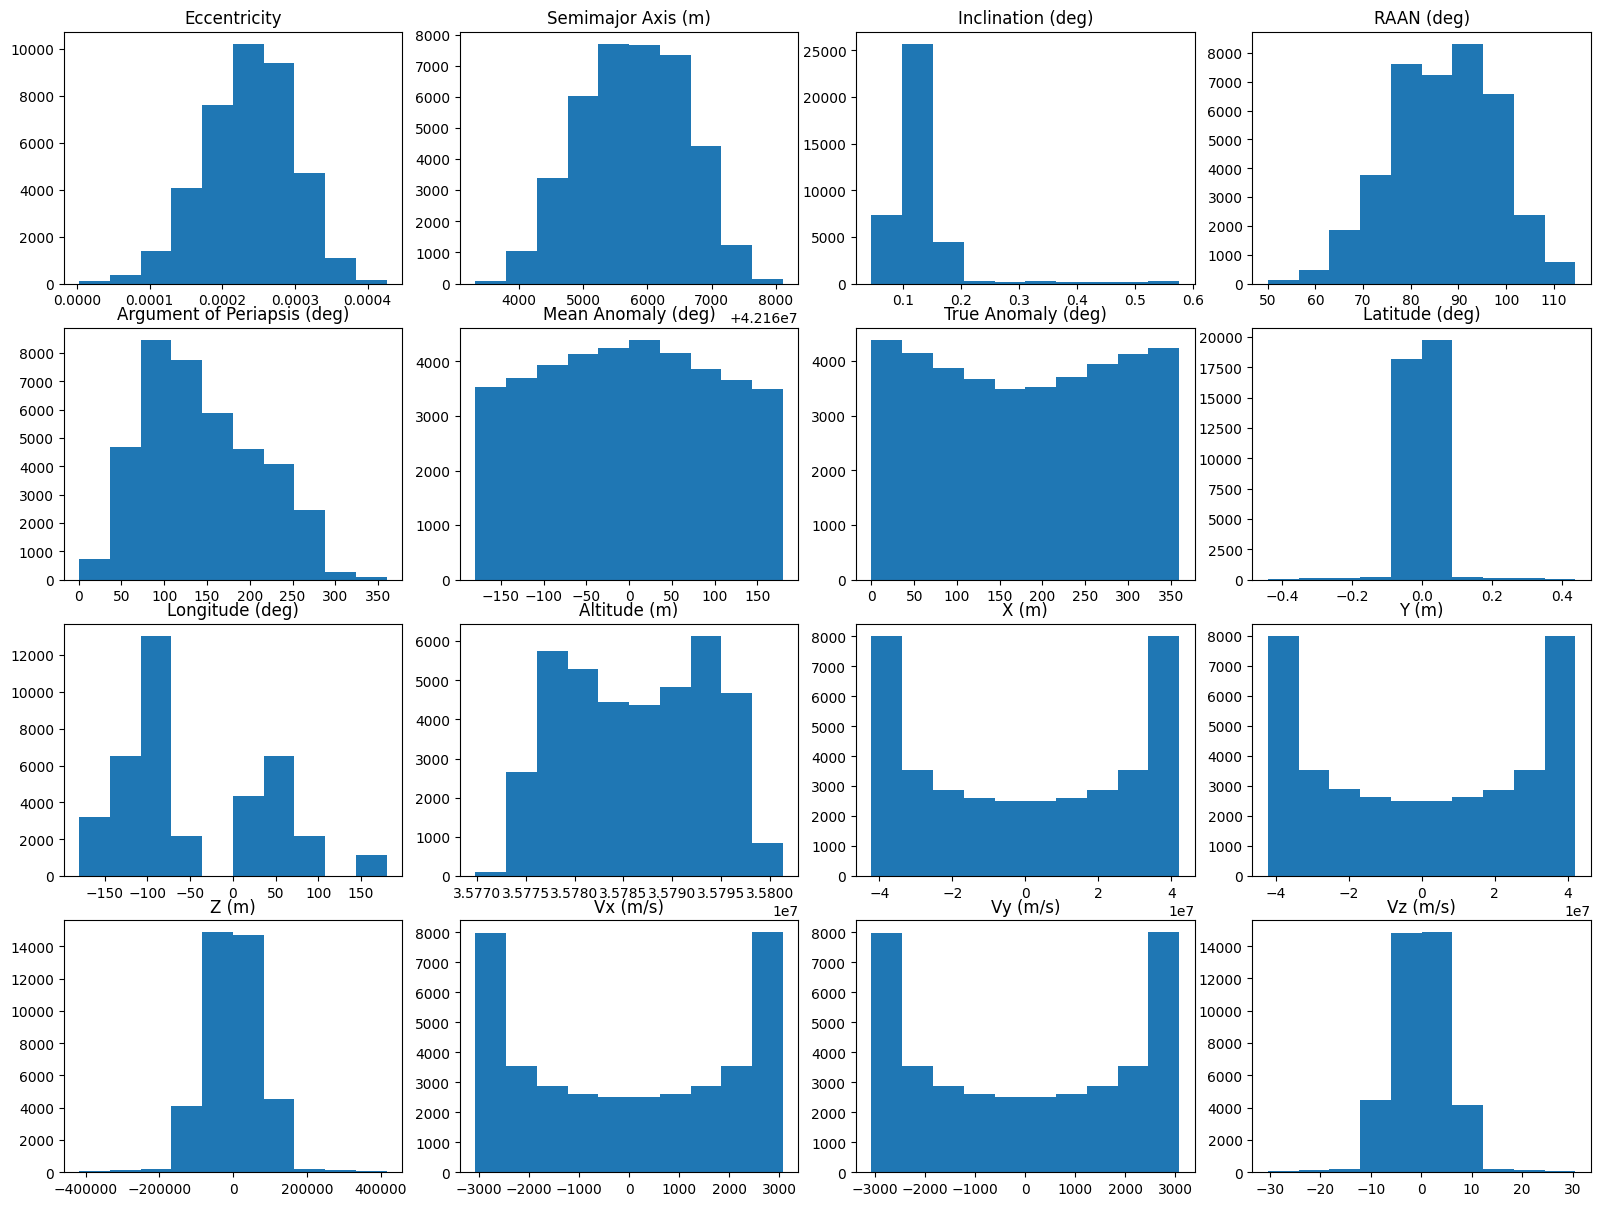

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,12))
plt.tight_layout()
for row in range(4):
    for column in range(4):
        feature = inputs[row*4+column]
        axes[row,column].hist(df[feature])
        axes[row,column].title.set_text(feature)
fig.show()

# TODO: some of the features cross sign boundaries -> feature engineering necessary!